In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Graph Config
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# TASK_1

In [2]:
from sklearn.manifold import TSNE

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
price = boston.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

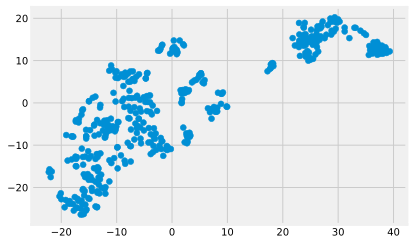

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# TASK_2

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3)

In [25]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [26]:
labels_test = kmeans.predict(X_test_scaled)

Text(30, 5, 'Cluster 2')

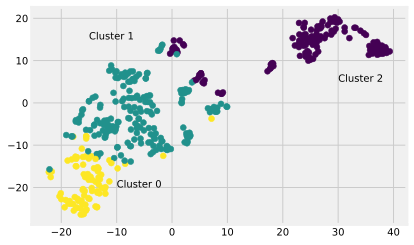

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-10, -20, 'Cluster 0')
plt.text(-15, 15, 'Cluster 1')
plt.text(30, 5, 'Cluster 2')

In [33]:
y_train[labels_train==0].mean()

16.1796875

In [34]:
y_train[labels_train==1].mean()

24.971204188481675

In [35]:
y_train[labels_train==2].mean()

27.87411764705882

In [36]:
X_train.loc[labels_train==0, 'CRIM'].mean()

10.715219062500003

In [37]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.42098554973821983

In [38]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353